Problem 1. 
===
Install newest release of TensorFlow 1.5 on the operating system of your
choice. Use installation instructions on https://www.tensorflow.org site and instructions
on https://github.com/tensorflow/tensorflow. Install TensorFlow for CPU. Use attach
Jupyter notebook: 0_test_install.ipynb to demonstrate that TensorFlow is properly
installed. Please document all installation steps including the version of Python you are
using. (20%)

Steps
---
* virtualenv --python python3 cscie89 # Create virtual environment for the class with python3.6
* pip install [supporting modules]
* pip install tensorflow
* pip freeze > requirement.txt

In [55]:
!python -V

Python 3.6.1


In [56]:
!pip show tensorflow

Name: tensorflow
Version: 1.5.0
Summary: TensorFlow helps the tensors flow
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: opensource@google.com
License: Apache 2.0
Location: /Users/yuzhang/hw/tensor/cscie89/lib/python3.6/site-packages
Requires: protobuf, six, absl-py, numpy, wheel, tensorflow-tensorboard


0_test_install tets code starts
------------------
------------------
This snippet of Python creates a simple graph.

In [57]:
import tensorflow as tf
hello = tf.constant('It works!')
sess = tf.Session()
print(sess.run(hello))

b'It works!'


Check that you have a recent version of TensorFlow installed, >= 0.12.0rc0

In [58]:
print("You have version %s" % tf.__version__)

You have version 1.5.0


We'll also use matplotlib, so let's test if that's working.

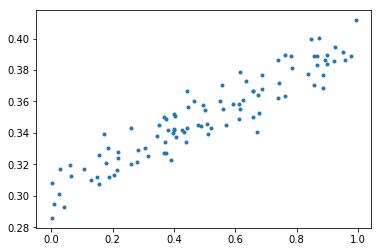

In [59]:
%matplotlib inline
import pylab
import numpy as np

# create some data using numpy. y = x * 0.1 + 0.3 + noise
x_train = np.random.rand(100).astype(np.float32)
noise = np.random.normal(scale=0.01, size=len(x_train))
y_train = x_train * 0.1 + 0.3 + noise

# plot it
pylab.plot(x_train, y_train, '.')

Problem 1 test code end
------------------
------------------

Problem 2. 
===
Represent the following expressions in TensorFlow
$$ y = x^2 + 3$$
$$ 𝑧 = (2 ∗ 𝑦 + 4)/x$$

Calculate and print the value of 𝑦 when 𝑥 is a series of values starting with 1, incremented by 1 and ending at 9. Define variable x with a placeholder so that you could feed different values of 𝑥 while calculating 𝑦. Similarly, calculate and print values of 𝑧. (20%)

In [60]:
import tensorflow as tf

In [61]:
# y = x^2 + 3
c3 = tf.constant(3, dtype=tf.float32, name="Constant_3")
x = tf.placeholder(tf.float32)
y = x*x + c3
for n in range(1, 10):
    with tf.Session() as sess:
        print("Feeding x={} run graph get {}".format(n, sess.run(y, feed_dict={x: n})))

Feeding x=1 run graph get 4.0
Feeding x=2 run graph get 7.0
Feeding x=3 run graph get 12.0
Feeding x=4 run graph get 19.0
Feeding x=5 run graph get 28.0
Feeding x=6 run graph get 39.0
Feeding x=7 run graph get 52.0
Feeding x=8 run graph get 67.0
Feeding x=9 run graph get 84.0


In [62]:
# z = (2*y +4)/x
c4 = tf.constant(4, dtype=tf.float32, name="Constant_4")
c2 = tf.constant(2, dtype=tf.float32, name="Constant_2")
z = (c2*y + c4)/x
for n in range(1, 10):
    with tf.Session() as sess:
        y_val, z_val = sess.run((y, z), feed_dict={x: n})
        print("Feeding x={} run graph get y = {}, z = {}".format(n, y_val, z_val))

Feeding x=1 run graph get y = 4.0, z = 12.0
Feeding x=2 run graph get y = 7.0, z = 9.0
Feeding x=3 run graph get y = 12.0, z = 9.333333015441895
Feeding x=4 run graph get y = 19.0, z = 10.5
Feeding x=5 run graph get y = 28.0, z = 12.0
Feeding x=6 run graph get y = 39.0, z = 13.666666984558105
Feeding x=7 run graph get y = 52.0, z = 15.428571701049805
Feeding x=8 run graph get y = 67.0, z = 17.25
Feeding x=9 run graph get y = 84.0, z = 19.11111068725586


Problem 3. 
===
Modify your TensorFlow code so that all variables, constants and operations have a “display name”. Generate a TensorBoard graph representing above equtions. (20%)

In [63]:
import tensorflow as tf
# With names:
#     y = x^2 + 3
#     z = (2*y +4)/x
g_named = tf.Graph()
with g_named.as_default():
    c3 = tf.constant(3, dtype=tf.float32, name="3")
    c4 = tf.constant(4, dtype=tf.float32, name="4")
    c2 = tf.constant(2, dtype=tf.float32, name="2")
    x = tf.placeholder(tf.float32, name = "x")
    x_sqr = tf.multiply(x, x, name = "squre")
    y = tf.add(x_sqr, c3, name = "plus")
    y_times_2 = tf.multiply(y, c2, name = "times")
    y_times_2_plus_4 = tf.add(y_times_2, c4, name = "plus")
    z = tf.div(y_times_2_plus_4, x, name = "divide")
    # Run for x in 1 - 9
    for n in range(1, 10):
        with tf.Session() as sess:
            y_val, z_val = sess.run((y, z), feed_dict={x: n})
            print("Feeding x={} run graph get y = {}, z = {}".format(n, y_val, z_val))
    # Write tensor flow to file
    tf.summary.FileWriter("hw2_p3_yz", g_named)

Feeding x=1 run graph get y = 4.0, z = 12.0
Feeding x=2 run graph get y = 7.0, z = 9.0
Feeding x=3 run graph get y = 12.0, z = 9.333333015441895
Feeding x=4 run graph get y = 19.0, z = 10.5
Feeding x=5 run graph get y = 28.0, z = 12.0
Feeding x=6 run graph get y = 39.0, z = 13.666666984558105
Feeding x=7 run graph get y = 52.0, z = 15.428571701049805
Feeding x=8 run graph get y = 67.0, z = 17.25
Feeding x=9 run graph get y = 84.0, z = 19.11111068725586


Generated TensorBoard Graph:
---
![hw2_p2.png](hw2_p2.png)

Problem 4.
===
Construct a simple neural network (a network of logistic units) which will implement the following truth table.

|x1|x2|x3|y|
|:-|:-|:-|:-|
|0|0|0|0|
|1|0|0|1| 
|0|1|0|1| 
|1|1|0|1| 
|0|0|1|0| 
|1|0|1|0|
|0|1|1|0| 
|1|1|1|0|
Present your neural network as a graph. Use any technique you find convenient, to draw that graph, including pencil and paper. Do scan the drawing and include the image in your submission.
(20%)

Solution:
---
$$h(x) = 20x_1 + 20x_2 - 40x_3 - 10$$
![hw2_p4.png](hw2_p4.png)    

Problem 5.
===
Express operations in the above neural network as operations in TensorFlow. Place variables x1 and x2 in one name scope and variables x3 and y in another name scope. Generate the TensorBoard graph of your operations. We are just practicing name scope separation in TensorBoard graphs.
(20%)

In [64]:
import tensorflow as tf
import numpy as np
# Set precision
np.set_printoptions(precision=2, suppress=True)

# X values according to table
#  each column represent [x1, x2, x3, 1].transpose()
FEED_X = np.array([
        [0, 1, 0, 1, 0, 1, 0, 1],  # x1
        [0, 0, 1, 1, 0, 0, 1, 1],  # x2
        [0, 0, 0, 0, 1, 1, 1, 1],  # x3
        [1, 1, 1, 1, 1, 1, 1, 1]   # bias 1
    ],
    dtype = np.float32)

# TRUTH Y as shown in table
TRUTH_Y= [0, 1, 1, 1, 0, 0, 0, 0]

# Constructed weights for each feature x and a bias of -10
WEIGHTS = np.array([[20, 20, -40, -10]], dtype = np.float32)

with tf.Graph().as_default():
    # Init weights and bias
    w = tf.constant(WEIGHTS)
    # Create place holder for X and bias
    x = tf.placeholder(tf.float32, shape=(4, 1))
    # y is sigmoid function sig(Z) where Z = [w1, w2, w3, 1]*[x1, x2, x3, b]T = w1*x1 + w2*x2 + w3*x3 + b
    y = tf.sigmoid(tf.matmul(w, x))
    for i in range(0, 8):
        sess= tf.Session()
        # Get i column as X
        feed = FEED_X[:, i]
        print("Feeding X : {}".format(feed[:3]))
        print("Expect y  : {}".format(TRUTH_Y[i]))
        print("Actual y  : {}\n".format(sess.run(y, feed_dict={x: feed.reshape(4, 1)})[0]))

Feeding X : [0. 0. 0.]
Expect y  : 0
Actual y  : [0.]

Feeding X : [1. 0. 0.]
Expect y  : 1
Actual y  : [1.]

Feeding X : [0. 1. 0.]
Expect y  : 1
Actual y  : [1.]

Feeding X : [1. 1. 0.]
Expect y  : 1
Actual y  : [1.]

Feeding X : [0. 0. 1.]
Expect y  : 0
Actual y  : [0.]

Feeding X : [1. 0. 1.]
Expect y  : 0
Actual y  : [0.]

Feeding X : [0. 1. 1.]
Expect y  : 0
Actual y  : [0.]

Feeding X : [1. 1. 1.]
Expect y  : 0
Actual y  : [0.]



Paste truth table here for comparision:

|x1|x2|x3|y|
|:-|:-|:-|:-|
|0|0|0|0|
|1|0|0|1| 
|0|1|0|1| 
|1|1|0|1| 
|0|0|1|0| 
|1|0|1|0|
|0|1|1|0| 
|1|1|1|0|